# Geopandas Plot

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# https://download-data.deutschebahn.com/static/datasets/haltestellen/D_Bahnhof_2020_alle.CSV
locations = pd.read_csv('../dat/D_Bahnhof_2020_all.csv', sep=';')

locations['Laenge'] = locations['Laenge'].str.replace(',', '.').astype(float)
locations['Breite'] = locations['Breite'].str.replace(',', '.').astype(float)

locations.head(2)

,EVA_NR,DS100,IFOPT,NAME,Verkehr,Laenge,Breite,Betreiber_Name,Betreiber_Nr,Status
0,8002551,AELB,de:02000:11943,Hamburg Elbbrücken,RV,10.0245,53.5345,DB Station und Service AG,NaN,neu
1,8001944,TETN,NaN,Eutingen Nord,RV,8.7531,48.4847,DB Station und Service AG,NaN,neu


In [4]:
station_subset = ['Essen Hbf','Leipzig Hbf', 'Magdeburg Hbf','Hamburg Hbf', 'Kiel Hbf', 'Stuttgart Hbf', 'Potsdam Hbf', 'Berlin Hbf', 'Erfurt Hbf', 'Hannover Hbf', 'Köln Hbf', 'Schwerin Hbf', 'München Hbf', 'Düsseldorf Hbf', 'Duisburg Hbf', 'Dresden Hbf', 'Mainz Hbf', 'Bremen Hbf', 'Saarbrücken Hbf', 'Dortmund Hbf', 'Karlsruhe Hbf', 'Nürnberg Hbf', 'Wiesbaden Hbf', 'Köln Hbf']

In [5]:
all_stations = ['Solingen Hbf', 'Bensheim', 'Rostock Hbf', 'Erlangen', 'München-Pasing', 'Regensburg Hbf', 'Lippstadt', 'Essen Hbf', 'Stendal Hbf', 'Bitterfeld', 'Hamm(Westf)Hbf', 'Hagen Hbf', 'Wittenberge', 'Bad Kleinen', 'Ribnitz-Damgarten Ost', 'Nienburg(Weser)', 'Berlin Ostbahnhof', 'Wanne-Eickel Hbf', 'Berlin-Spandau', 'Leipzig Hbf', 'Magdeburg Hbf', 'Gotha', 'Köln Messe/Deutz', 'Verden(Aller)', 'Hannover Messe/Laatzen', 'Hamburg Hbf', 'Kiel Hbf', 'Günzburg', 'Rosenheim', 'Soest', 'Warburg(Westf)', 'Recklinghausen Hbf', 'Stuttgart Hbf', 'Pforzheim Hbf', 'Freiburg(Breisgau) Hbf', 'Paderborn Hbf', 'Neustadt(Weinstr)Hbf', 'Bochum Hbf', 'Berlin Südkreuz', 'Münster(Westf)Hbf', 'Potsdam Hbf', 'Halle(Saale)Hbf', 'Berlin Hbf', 'Donauwörth', 'Neumünster', 'Bützow', 'Erfurt Hbf', 'Wolfsburg Hbf', 'Mönchengladbach Hbf', 'Frankfurt am Main Flughafen Fernbahnhof', 'Ludwigsburg', 'Hamburg Dammtor', 'Hannover Hbf', 'Braunschweig Hbf', 'Neuss Hbf', 'Wabern(Bz Kassel)', 'Ingolstadt Hbf', 'Brandenburg Hbf', 'Bruchsal', 'Treysa', 'Homburg(Saar)Hbf', 'Köln Hbf', 'Treuchtlingen', 'Anklam', 'Offenburg', 'Gießen', 'Schwerin Hbf', 'München Hbf', 'Greifswald', 'Bonn Hbf', 'Hamburg-Altona', 'Düren', 'Weilheim(Oberbay)', 'Koblenz Hbf', 'Kaiserslautern Hbf', 'Göttingen', 'Marburg(Lahn)', 'Velgast', 'Weißenfels', 'Freilassing', 'Oberhausen Hbf', 'Düsseldorf Hbf', 'Stadtallendorf', 'Karlsruhe-Durlach', 'Ludwigslust', 'Angermünde', 'Montabaur', 'Augsburg Hbf', 'Wiesloch-Walldorf', 'Aschaffenburg Hbf', 'Lübeck Hbf', 'Siegburg/Bonn', 'Duisburg Hbf', 'Ribnitz-Damgarten West', 'Bad Hersfeld', 'Fulda', 'Prenzlau', 'Göppingen', 'Darmstadt Hbf', 'Celle', 'Dresden Hbf', 'Ulm Hbf', 'Riesa', 'Osnabrück Hbf', 'Berlin Gesundbrunnen', 'Aachen Hbf', 'Altenbeken', 'Kassel-Wilhelmshöhe', 'Köln/Bonn Flughafen', 'Gütersloh Hbf', 'Baden-Baden', 'Neustrelitz Hbf', 'Delmenhorst', 'Uelzen', 'Mainz Hbf', 'Plochingen', 'Naumburg(Saale)Hbf', 'Dresden-Neustadt', 'Eberswalde Hbf', 'Frankfurt(Main)Hbf', 'Bamberg', 'München Ost', 'Passau Hbf', 'Heidelberg Hbf', 'Bremen Hbf', 'Hildesheim Hbf', 'Lutherstadt Wittenberg Hbf', 'Saarbrücken Hbf', 'Tutzing', 'Dortmund Hbf', 'Hanau Hbf', 'Traunstein', 'Friedberg(Hess)', 'Frankfurt(Main)Süd', 'Stralsund Hbf', 'Züssow', 'Karlsruhe Hbf', 'Herford', 'Gelsenkirchen Hbf', 'Bielefeld Hbf', 'Weimar', 'Pasewalk', 'Frankfurt(Main)West', 'Nürnberg Hbf', 'Wuppertal Hbf', 'Mannheim Hbf', 'Wiesbaden Hbf', 'Andernach', 'Berlin Wannsee', 'Würzburg Hbf', 'Lüneburg', 'Plattling', 'Minden(Westf)', 'Weinheim(Bergstr)Hbf', 'Eisenach']
hbf_stations = [item for item in all_stations if "Hbf" in item]
hbf_stations

['Solingen Hbf',
 'Rostock Hbf',
 'Regensburg Hbf',
 'Essen Hbf',
 'Stendal Hbf',
 'Hamm(Westf)Hbf',
 'Hagen Hbf',
 'Wanne-Eickel Hbf',
 'Leipzig Hbf',
 'Magdeburg Hbf',
 'Hamburg Hbf',
 'Kiel Hbf',
 'Recklinghausen Hbf',
 'Stuttgart Hbf',
 'Pforzheim Hbf',
 'Freiburg(Breisgau) Hbf',
 'Paderborn Hbf',
 'Neustadt(Weinstr)Hbf',
 'Bochum Hbf',
 'Münster(Westf)Hbf',
 'Potsdam Hbf',
 'Halle(Saale)Hbf',
 'Berlin Hbf',
 'Erfurt Hbf',
 'Wolfsburg Hbf',
 'Mönchengladbach Hbf',
 'Hannover Hbf',
 'Braunschweig Hbf',
 'Neuss Hbf',
 'Ingolstadt Hbf',
 'Brandenburg Hbf',
 'Homburg(Saar)Hbf',
 'Köln Hbf',
 'Schwerin Hbf',
 'München Hbf',
 'Bonn Hbf',
 'Koblenz Hbf',
 'Kaiserslautern Hbf',
 'Oberhausen Hbf',
 'Düsseldorf Hbf',
 'Augsburg Hbf',
 'Aschaffenburg Hbf',
 'Lübeck Hbf',
 'Duisburg Hbf',
 'Darmstadt Hbf',
 'Dresden Hbf',
 'Ulm Hbf',
 'Osnabrück Hbf',
 'Aachen Hbf',
 'Gütersloh Hbf',
 'Neustrelitz Hbf',
 'Mainz Hbf',
 'Naumburg(Saale)Hbf',
 'Eberswalde Hbf',
 'Frankfurt(Main)Hbf',
 'Passau Hbf

In [6]:
selected_hbf = ['Solingen Hbf', 'Rostock Hbf', 'Regensburg Hbf', 'Essen Hbf', 'Stendal Hbf', 'Hamm(Westf)Hbf', 'Hagen Hbf', 'Leipzig Hbf', 'Magdeburg Hbf', 'Hamburg Hbf', 'Kiel Hbf', 'Recklinghausen Hbf', 'Stuttgart Hbf', 'Pforzheim Hbf', 'Freiburg(Breisgau) Hbf', 'Paderborn Hbf', 'Neustadt(Weinstr)Hbf', 'Bochum Hbf', 'Münster(Westf)Hbf', 'Potsdam Hbf', 'Halle(Saale)Hbf', 'Berlin Hbf', 'Erfurt Hbf', 'Wolfsburg Hbf', 'Mönchengladbach Hbf', 'Hannover Hbf', 'Braunschweig Hbf', 'Neuss Hbf', 'Ingolstadt Hbf', 'Brandenburg Hbf', 'Homburg(Saar)Hbf', 'Köln Hbf', 'Schwerin Hbf', 'München Hbf', 'Bonn Hbf', 'Koblenz Hbf', 'Kaiserslautern Hbf', 'Oberhausen Hbf', 'Düsseldorf Hbf', 'Augsburg Hbf', 'Aschaffenburg Hbf', 'Lübeck Hbf', 'Duisburg Hbf', 'Darmstadt Hbf', 'Dresden Hbf', 'Ulm Hbf', 'Osnabrück Hbf', 'Aachen Hbf', 'Gütersloh Hbf', 'Neustrelitz Hbf', 'Mainz Hbf', 'Frankfurt(Main)Hbf', 'Passau Hbf', 'Heidelberg Hbf', 'Bremen Hbf', 'Hildesheim Hbf', 'Lutherstadt Wittenberg Hbf', 'Saarbrücken Hbf', 'Dortmund Hbf', 'Hanau Hbf', 'Stralsund Hbf', 'Karlsruhe Hbf', 'Gelsenkirchen Hbf', 'Bielefeld Hbf', 'Nürnberg Hbf','Wuppertal Hbf','Mannheim Hbf','Wiesbaden Hbf', 'Würzburg Hbf']
len(selected_hbf)

cities = ['München', 'Stuttgart', 'Düsseldorf', 'Dresden', 'Wiesbaden', 'Hannover', 'Erfurt', 'Kiel', 'Saarbrücken', 'Mainz', 'Magdeburg', 'Potsdam', 'Bremen', 'Hamburg', 'Berlin', 'Köln', 'Nürnberg', 'Essen', 'Leipzig', 'Dortmund', 'Duisburg', 'Karlsruhe', 'Dresden', 'Schwerin']
print(len(cities))
köln = [item for item in all_stations if 'Köln Hbf' in item]
print(köln)
main_top_stations_all = [item for item in all_stations if any(sub in item for sub in cities)]
main_top_stations = [item for item in main_top_stations_all if 'Hbf' in item] + köln
print(len(main_top_stations))
print(main_top_stations)

24
['Köln Hbf']
24
['Essen Hbf', 'Leipzig Hbf', 'Magdeburg Hbf', 'Hamburg Hbf', 'Kiel Hbf', 'Stuttgart Hbf', 'Potsdam Hbf', 'Berlin Hbf', 'Erfurt Hbf', 'Hannover Hbf', 'Köln Hbf', 'Schwerin Hbf', 'München Hbf', 'Düsseldorf Hbf', 'Duisburg Hbf', 'Dresden Hbf', 'Mainz Hbf', 'Bremen Hbf', 'Saarbrücken Hbf', 'Dortmund Hbf', 'Karlsruhe Hbf', 'Nürnberg Hbf', 'Wiesbaden Hbf', 'Köln Hbf']


In [35]:
frankfurt = locations[locations['NAME'] == "Frankfurt(Main)Hbf"]

mainstations = locations[locations['NAME'].str.contains("Hbf")]
trainstation_subset_locations = locations[locations['NAME'].isin(station_subset)]
trainstation_subset_locations.head()

frankfurt

,EVA_NR,DS100,IFOPT,NAME,Verkehr,Laenge,Breite,Betreiber_Name,Betreiber_Nr,Status
117,8000105,FF,de:06412:10,Frankfurt(Main)Hbf,FV,8.663789,50.107145,DB Station und Service AG,1866.0,NaN


In [28]:
float(frankfurt.Laenge)

/var/folders/1c/78x0c05d3tx162gplqq1961h0000gn/T/ipykernel_3130/3007210339.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(frankfurt.Laenge)


8.663789

In [24]:
for index, station in trainstation_subset_locations.iterrows():
    print(frankfurt.Laenge[0])
    a = [station.Laenge, frankfurt.Laenge]
    print(a)

KeyError: 0

/var/folders/1c/78x0c05d3tx162gplqq1961h0000gn/T/ipykernel_3130/3844322662.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/1c/78x0c05d3tx162gplqq1961h0000gn/T/ipykernel_3130/3844322662.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  plt.plot([station.Laenge, float(frankfurt.Laenge)], [station.Breite, float(frankfurt.Breite)], 'k-', alpha=0.5)


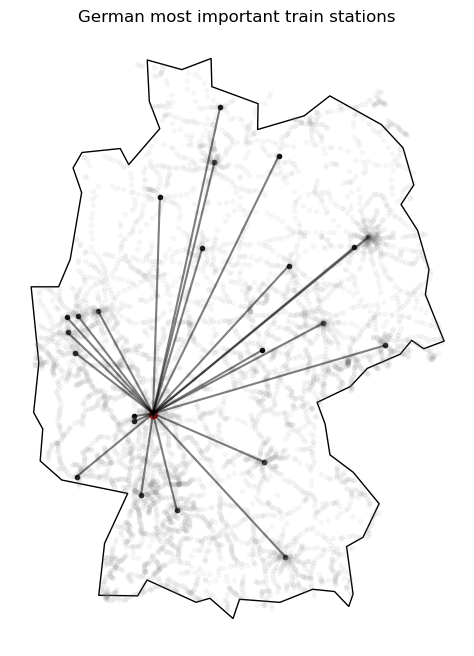

In [47]:
# Load Natural Earth countries dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter Germany
germany = world[world['name'] == 'Germany']

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))
germany.plot(ax=ax, color='white', edgecolor='black')



for index, station in trainstation_subset_locations.iterrows():
    plt.plot([station.Laenge, float(frankfurt.Laenge)], [station.Breite, float(frankfurt.Breite)], 'k-', alpha=0.5)

plt.scatter(trainstation_subset_locations.Laenge, trainstation_subset_locations.Breite, c='black', marker='.')
plt.scatter(frankfurt.Laenge, frankfurt.Breite, c='red')

plt.scatter(locations.Laenge, locations.Breite, alpha=0.05, marker='.', c='grey')


# Add title
plt.title('German most important train stations')

# Delete axis
plt.axis('off')

# Show the plot
plt.show()

In [ ]:
# exemplarisch nur einen Bahnhof von Stuttgart nach überall hin zB
